<a href="https://colab.research.google.com/github/coetzew/Data-Science/blob/main/Toronto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IBM DATA SCIENCE CAPSTONE PROJECT**

## **Purpose:**
* To learn to use Foursquare API to access location data.
* To cluster neighbourhoods in Toronto based on venues in the neighbourhood.

# **Part 1**

### Scrape wikipedia to get postal codes of Toronto

In [1]:
!pip install bs4              #!pip install requests
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests               # this module helps us to download a web page
import pandas as pd
import numpy as np

In [2]:
#The below url contains html tables with Toronto postal codes.
#url = "https://en.wikipedia.org/wiki/World_population"
url= "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

In [4]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>
tables

[<table cellpadding="2" cellspacing="0" rules="all" style="width:100%; border-collapse:collapse; border:1px solid #ccc;">
 
 <tbody><tr>
 <td style="width:11%; vertical-align:top; color:#ccc;">
 <p><b>M1A</b><br/><span style="font-size:85%;"><i>Not assigned</i></span>
 </p>
 </td>
 <td style="width:11%; vertical-align:top; color:#ccc;">
 <p><b>M2A</b><br/><span style="font-size:85%;"><i>Not assigned</i></span>
 </p>
 </td>
 <td style="width:11%; vertical-align:top;">
 <p><b>M3A</b><br/><span style="font-size:85%;"><a href="/wiki/North_York" title="North York">North York</a><br/>(<a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>)</span>
 </p>
 </td>
 <td style="width:11%; vertical-align:top;">
 <p><b>M4A</b><br/><span style="font-size:85%;"><a href="/wiki/North_York" title="North York">North York</a><br/>(<a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>)</span>
 </p>
 </td>
 <td style="width:11%; vertical-align:top;">
 <p><b>M5A</b><br/><span style=

In [5]:
df=pd.read_html(url, match="Toronto", flavor='bs4')[0]
# Flavor is part of Soap package…

df.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


In [6]:
# Get First 3 character of a string in python
matrix = df.to_numpy()
matrix
code02=matrix[0][2]
code02

'M3ANorth York(Parkwoods)'

In [7]:
post_code = code02[0:3]
post_code

'M3A'

In [8]:
area = code02[3:]
area

'North York(Parkwoods)'

In [9]:
borough = area.partition('(')[0]
print(borough)

North York


In [10]:
start = '('
end = ')'
neighborhood = (code02.split(start))[1].split(end)[0]
print("n=",neighborhood)

n= Parkwoods


## Extract postal codes, boroughs and neighborhoods from scraped data

In [12]:
post_code=np.empty([180],dtype=object)
borough=np.empty([180],dtype=object)
neighborhood=np.empty([180],dtype=object)

k=0

start = '('
end = ')'

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        #print(matrix[i][j], end=' ')
        code=matrix[i][j]
        p = code[0:3]
        area = code[3:]
        b = area.partition('(')[0]
        if b=='Not assigned':
            n=""
        else:
            n=area.split(start)[1].split(end)[0]
        
        #print(p,b,n)
        
        post_code[k]=p
        borough[k]=b
        neighborhood[k]=n
        k=k+1

## Create Toronto dataframe

In [36]:
tor_df=pd.DataFrame({'post_code': post_code, 'borough': borough, 'neighborhood': neighborhood})
tor_df.head(10)

,post_code,borough,neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Queen's Park,Ontario Provincial Government
7,M8A,Not assigned,
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge


### Preprocessing:
Get rid of the "Not assigned" / Replace

In [37]:

tor_df = tor_df[tor_df['borough'] != "Not assigned"]
tor_df.head(10)

,post_code,borough,neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Queen's Park,Ontario Provincial Government
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge
11,M3B,North York,Don Mills
12,M4B,East York,Parkview Hill / Woodbine Gardens
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [32]:
tor_df.shape

(103, 3)

In [38]:

#Now combine all the neighbourhoods with the same postal codes
tor_df = tor_df.groupby(["post_code","borough"])["neighborhood"].apply(list)
tor_df = tor_df.sample(frac=1).reset_index()
tor_df["neighborhood"] = tor_df["neighborhood"].str.join(', ')
tor_df.head(10)

,post_code,borough,neighborhood
0,M5S,Downtown Toronto,University of Toronto / Harbord
1,M6E,York,Caledonia-Fairbanks
2,M9P,Etobicoke,Westmount
3,M2M,North York,Willowdale / Newtonbrook
4,M9W,EtobicokeNorthwest,Clairville / Humberwood / Woodbine Downs / Wes...
5,M4T,Central Toronto,Moore Park / Summerhill East
6,M3H,North York,Bathurst Manor / Wilson Heights / Downsview North
7,M6K,West Toronto,Brockton / Parkdale Village / Exhibition Place
8,M5J,Downtown Toronto,Harbourfront East / Union Station / Toronto Is...
9,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...


In [39]:
tor_df.shape

(103, 3)

## So the dataset has 103 rows

# **Part 2**

## Get the lattitude and longitude for each neighbourhood
Use https://pypi.org/project/pgeocode/

In [40]:
!pip install pgeocode

In [41]:
# Example

import pgeocode

nomi = pgeocode.Nominatim('fr')  #France
nomi.query_postal_code("75013")

postal_code                 75013
country_code                   FR
place_name        Paris 13, Paris
state_name          Île-de-France
state_code                     11
county_name                 Paris
county_code                    75
community_name              Paris
community_code                751
latitude                  48.8322
longitude                 2.35245
accuracy                        5
Name: 0, dtype: object

## Get longitudes and latitudes for neighborhoods in Toronto

In [44]:
nomi = pgeocode.Nominatim('ca') # Canada


lat=np.empty([180],dtype=float)
long=np.empty([180],dtype=float)

for k in range(len(tor_df)):
    p=tor_df[k]
    df1=nomi.query_postal_code(p) 
    lat[k]=df1['latitude']
    long[k]=df1['longitude'] 
    
tor_df2=pd.DataFrame({'Post_code': post_code, 'Borough': borough, 'Neighborhood': neighborhood, 'Latitude': lat, 'Longitude':long})
tor_df2.head()

KeyError: ignored

In [46]:
#Get the Latitude and Langitude to match the Postcode
!wget -q -O 'Geospatial_Coordinates.csv' http://cocl.us/Geospatial_data
geo = pd.read_csv("Geospatial_Coordinates.csv", index_col = 0)         
tor_df2 = tor_df.join(geo, on = "post_code")

#Take only those neighborhoods that contain the word Toronto
#Tor_df = Tor_df[Tor_df['Borough'].str.contains('Toronto')].reset_index(drop=True)

tor_df2.head()

,post_code,borough,neighborhood,Latitude,Longitude
0,M5S,Downtown Toronto,University of Toronto / Harbord,43.662696,-79.400049
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M9P,Etobicoke,Westmount,43.696319,-79.532242
3,M2M,North York,Willowdale / Newtonbrook,43.789053,-79.408493
4,M9W,EtobicokeNorthwest,Clairville / Humberwood / Woodbine Downs / Wes...,43.706748,-79.594054


In [47]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(tor_df2['borough'].unique()),
        tor_df2.shape[0]
    )
)

The dataframe has 15 boroughs and 103 neighborhoods.


In [48]:
tor_df=tor_df2

In [49]:
tor_df.shape

(103, 5)

## Part 3

In [50]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


In [52]:
# 
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [53]:
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 81kB 7.6MB/s 
  Created wheel for folium: filename=folium-0.5.0-cp37-none-any.whl size=76131 sha256=62212c25d3972246f863550e59b7a56f721f27c9abdc094ab79e37ad867f6157
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.5.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


Folium installed
Libraries imported.


In [55]:
# create map of Toronto using latitude and longitude values


map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(tor_df['Latitude'], tor_df['Longitude'], tor_df['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [56]:
# Define my FourSquare credentials

CLIENT_ID = 'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret

#Wilma personal details:
CLIENT_ID = 'WR3QJPNDLRGK22IBWCIARR3NNYKUMPGQJJCSKZF4KWPAXVAL' # your Foursquare ID
CLIENT_SECRET = 'FXPDLYDGX5BCVATJ5ROJYY0O245COPZ20TJTARKU32UQ212O' # your Foursquare Secret
ACCESS_TOKEN = 'WCZJ2KTROSQZX5DHCVOE5VVARBS01YUAKCO5FVBPZTP0PTJ3' # your FourSquare Access Token
#-----------------------------------------------------------------------------------------------

VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WR3QJPNDLRGK22IBWCIARR3NNYKUMPGQJJCSKZF4KWPAXVAL
CLIENT_SECRET:FXPDLYDGX5BCVATJ5ROJYY0O245COPZ20TJTARKU32UQ212O


## Explore neighbourhoods of Toronto

In [57]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [58]:
toronto_venues = getNearbyVenues(names=tor_df['neighborhood'],
                                   latitudes=tor_df['Latitude'],
                                   longitudes=tor_df['Longitude']
                                  )

#toronto_venues

University of Toronto / Harbord
Caledonia-Fairbanks
Westmount
Willowdale / Newtonbrook
Clairville / Humberwood / Woodbine Downs / West Humber / Kipling Heights / Rexdale / Elms / Tandridge / Old Rexdale
Moore Park / Summerhill East
Bathurst Manor / Wilson Heights / Downsview North
Brockton / Parkdale Village / Exhibition Place
Harbourfront East / Union Station / Toronto Islands
Kingsview Village / St. Phillips / Martin Grove Gardens / Richview Gardens
The Kingsway / Montgomery Road / Old Mill North
St. James Town / Cabbagetown
The Danforth East
Toronto Dominion Centre / Design Exchange
New Toronto / Mimico South / Humber Bay Shores
Forest Hill North & West
Clarks Corners / Tam O'Shanter / Sullivan
Lawrence Manor / Lawrence Heights
Commerce Court / Victoria Hotel
Humber Summit
Central Bay Street
Thorncliffe Park
India Bazaar / The Beaches West
Guildwood / Morningside / West Hill
Ontario Provincial Government
Downsview
The Annex / North Midtown / Yorkville
Rosedale
Humberlea / Emery
York

In [59]:
print(toronto_venues.shape)
toronto_venues.head()

(2119, 7)


,Neighborhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,University of Toronto / Harbord,43.662696,-79.400049,Yasu,43.662837,-79.403217,Japanese Restaurant
1,University of Toronto / Harbord,43.662696,-79.400049,Piano Piano,43.662949,-79.402898,Italian Restaurant
2,University of Toronto / Harbord,43.662696,-79.400049,Rasa,43.662757,-79.403988,Restaurant
3,University of Toronto / Harbord,43.662696,-79.400049,The Dessert Kitchen,43.662823,-79.402746,Dessert Shop
4,University of Toronto / Harbord,43.662696,-79.400049,Sivananda Yoga Centre,43.662754,-79.402951,Yoga Studio


In [60]:
toronto_venues.groupby('Neighborhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
Alderwood / Long Branch,9,9,9,9,9,9
Bathurst Manor / Wilson Heights / Downsview North,20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
Bedford Park / Lawrence Manor East,27,27,27,27,27,27
Berczy Park,58,58,58,58,58,58
Birch Cliff / Cliffside West,4,4,4,4,4,4
Brockton / Parkdale Village / Exhibition Place,23,23,23,23,23,23
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,16,16,16,16,16,16


In [61]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 276 uniques categories.


In [62]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [64]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_grouped

In [65]:
toronto_grouped.shape

(95, 276)

In [66]:
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000

In [67]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3               Skating Rink  0.25
4                Yoga Studio  0.00


----Alderwood / Long Branch----
            venue  freq
0     Pizza Place  0.22
1             Pub  0.11
2        Pharmacy  0.11
3             Gym  0.11
4  Sandwich Place  0.11


----Bathurst Manor / Wilson Heights / Downsview North----
         venue  freq
0         Bank  0.10
1  Coffee Shop  0.10
2  Pizza Place  0.05
3        Diner  0.05
4  Bridal Shop  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2   Chinese Restaurant  0.25
3                 Bank  0.25
4                Motel  0.00


----Bedford Park / Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.07
1      Sandwich Place  0.07
2         Pizza Place  0.07
3          Restaurant  0.07
4         Coffee Shop  

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Discount Store,Electronics Store
1,Alderwood / Long Branch,Pizza Place,Playground,Skating Rink,Gym,Coffee Shop,Pharmacy,Sandwich Place,Pub,Dog Run,Dim Sum Restaurant
2,Bathurst Manor / Wilson Heights / Downsview North,Bank,Coffee Shop,Mobile Phone Shop,Sushi Restaurant,Intersection,Ice Cream Shop,Restaurant,Deli / Bodega,Fried Chicken Joint,Frozen Yogurt Shop
3,Bayview Village,Café,Chinese Restaurant,Japanese Restaurant,Bank,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,Bedford Park / Lawrence Manor East,Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Thai Restaurant,Boutique,Comfort Food Restaurant,Juice Bar


## Run k-means cluster

In [70]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
Libraries imported.


In [71]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Discount Store,Electronics Store
1,Alderwood / Long Branch,Pizza Place,Playground,Skating Rink,Gym,Coffee Shop,Pharmacy,Sandwich Place,Pub,Dog Run,Dim Sum Restaurant
2,Bathurst Manor / Wilson Heights / Downsview North,Bank,Coffee Shop,Mobile Phone Shop,Sushi Restaurant,Intersection,Ice Cream Shop,Restaurant,Deli / Bodega,Fried Chicken Joint,Frozen Yogurt Shop
3,Bayview Village,Café,Chinese Restaurant,Japanese Restaurant,Bank,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,Bedford Park / Lawrence Manor East,Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Thai Restaurant,Boutique,Comfort Food Restaurant,Juice Bar


In [72]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

kmeans.labels_[0:200] 

array([3, 1, 1, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       3, 4, 3, 4, 3, 3, 0, 4, 3, 4, 1, 3, 3, 3, 2, 1, 3, 3, 4, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 1,
       4, 3, 3, 3, 1, 3, 4], dtype=int32)

In [74]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)






ValueError: ignored

In [86]:

toronto_merged = tor_df
toronto_merged.columns = ['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']
toronto_merged.head()



,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5S,Downtown Toronto,University of Toronto / Harbord,43.662696,-79.400049
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M9P,Etobicoke,Westmount,43.696319,-79.532242
3,M2M,North York,Willowdale / Newtonbrook,43.789053,-79.408493
4,M9W,EtobicokeNorthwest,Clairville / Humberwood / Woodbine Downs / Wes...,43.706748,-79.594054


In [77]:
toronto_merged.shape

(95, 12)

In [87]:
# merge toronto_grouped with tor_df to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5S,Downtown Toronto,University of Toronto / Harbord,43.662696,-79.400049,3.0,Café,Bookstore,Bakery,Bar,Japanese Restaurant,Yoga Studio,Bank,Italian Restaurant,Beer Bar,Beer Store
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,4.0,Park,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
2,M9P,Etobicoke,Westmount,43.696319,-79.532242,1.0,Pizza Place,Discount Store,Intersection,Middle Eastern Restaurant,Sandwich Place,Coffee Shop,Playground,Chinese Restaurant,Women's Store,Dog Run
3,M2M,North York,Willowdale / Newtonbrook,43.789053,-79.408493,3.0,Piano Bar,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
4,M9W,EtobicokeNorthwest,Clairville / Humberwood / Woodbine Downs / Wes...,43.706748,-79.594054,3.0,Truck Stop,Rental Car Location,Garden Center,Drugstore,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


In [88]:
neighborhoods_venues_sorted.head(75)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Agincourt,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Discount Store,Electronics Store
1,1,Alderwood / Long Branch,Pizza Place,Playground,Skating Rink,Gym,Coffee Shop,Pharmacy,Sandwich Place,Pub,Dog Run,Dim Sum Restaurant
2,1,Bathurst Manor / Wilson Heights / Downsview North,Bank,Coffee Shop,Mobile Phone Shop,Sushi Restaurant,Intersection,Ice Cream Shop,Restaurant,Deli / Bodega,Fried Chicken Joint,Frozen Yogurt Shop
3,3,Bayview Village,Café,Chinese Restaurant,Japanese Restaurant,Bank,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,3,Bedford Park / Lawrence Manor East,Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Thai Restaurant,Boutique,Comfort Food Restaurant,Juice Bar
5,3,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Farmers Market,Pharmacy,Seafood Restaurant,Cheese Shop,Restaurant,Basketball Stadium
6,3,Birch Cliff / Cliffside West,Café,General Entertainment,Skating Rink,College Stadium,Concert Hall,Construction & Landscaping,Falafel Restaurant,Event Space,Ethiopian Restaurant,Comfort Food Restaurant
7,3,Brockton / Parkdale Village / Exhibition Place,Café,Coffee Shop,Bakery,Breakfast Spot,Grocery Store,Restaurant,Italian Restaurant,Stadium,Furniture / Home Store,Climbing Gym
8,3,CN Tower / King and Spadina / Railway Lands / ...,Airport Terminal,Airport Lounge,Harbor / Marina,Coffee Shop,Plane,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry
9,4,Caledonia-Fairbanks,Park,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant


In [89]:
toronto_merged_1=toronto_merged.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [90]:
toronto_merged_1['Cluster Labels'].drop_duplicates()

0     3.0
1     4.0
2     1.0
28    2.0
56    0.0
Name: Cluster Labels, dtype: float64

In [91]:
#Ensure that cluster numbers are integers

toronto_merged_1['Cluster Labels']=toronto_merged_1['Cluster Labels'].round(0).astype(int)
toronto_merged_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5S,Downtown Toronto,University of Toronto / Harbord,43.662696,-79.400049,3,Café,Bookstore,Bakery,Bar,Japanese Restaurant,Yoga Studio,Bank,Italian Restaurant,Beer Bar,Beer Store
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,4,Park,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
2,M9P,Etobicoke,Westmount,43.696319,-79.532242,1,Pizza Place,Discount Store,Intersection,Middle Eastern Restaurant,Sandwich Place,Coffee Shop,Playground,Chinese Restaurant,Women's Store,Dog Run
3,M2M,North York,Willowdale / Newtonbrook,43.789053,-79.408493,3,Piano Bar,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
4,M9W,EtobicokeNorthwest,Clairville / Humberwood / Woodbine Downs / Wes...,43.706748,-79.594054,3,Truck Stop,Rental Car Location,Garden Center,Drugstore,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


In [99]:
# Add this command to ensure map is showing in Github
# shap.initjs()

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_1['Latitude'], toronto_merged_1['Longitude'], toronto_merged_1['Neighborhood'], toronto_merged_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        
                
        color=rainbow[cluster-1], 
        fill_color=rainbow[cluster-1],
        
              
        
        fill=True,
        
        
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

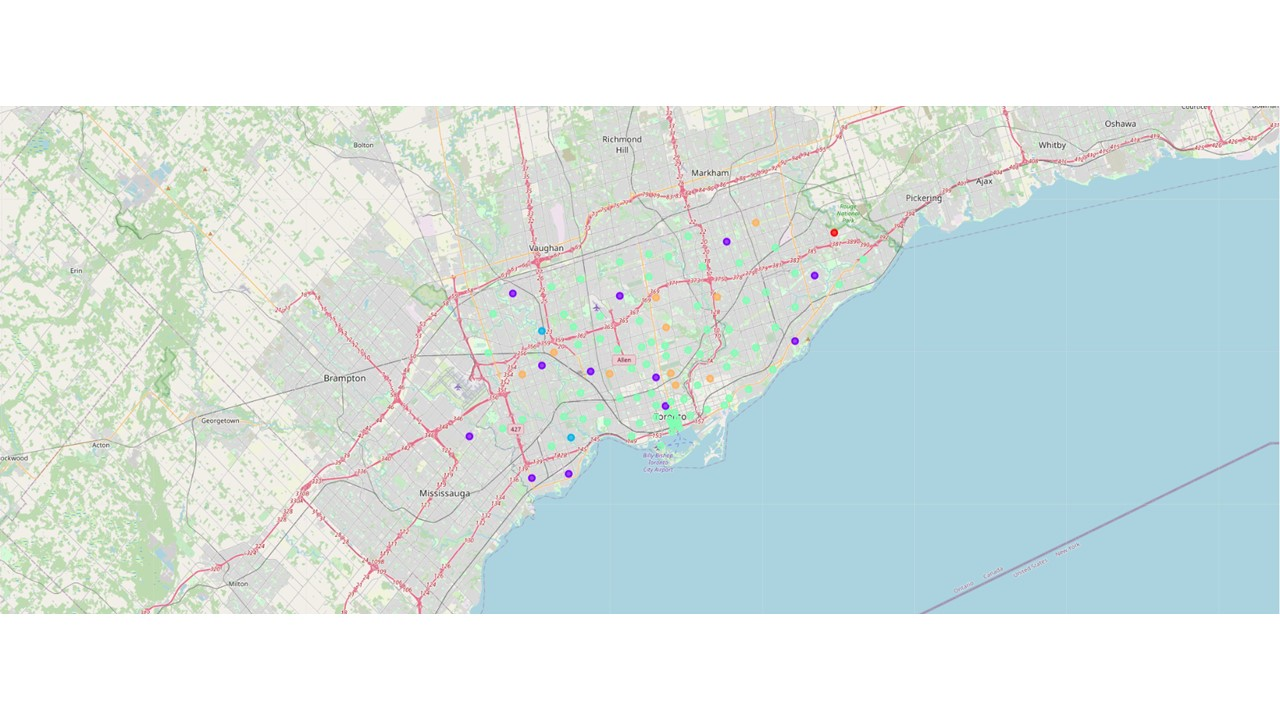

In [93]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Scarborough,0.0,Fast Food Restaurant,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium


In [94]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Etobicoke,1.0,Pizza Place,Discount Store,Intersection,Middle Eastern Restaurant,Sandwich Place,Coffee Shop,Playground,Chinese Restaurant,Women's Store,Dog Run
6,North York,1.0,Bank,Coffee Shop,Mobile Phone Shop,Sushi Restaurant,Intersection,Ice Cream Shop,Restaurant,Deli / Bodega,Fried Chicken Joint,Frozen Yogurt Shop
14,Etobicoke,1.0,Gym,Coffee Shop,Fast Food Restaurant,Mexican Restaurant,Bakery,Café,Restaurant,American Restaurant,Liquor Store,Pizza Place
19,North York,1.0,Furniture / Home Store,Restaurant,Pizza Place,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
24,Queen's Park,1.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Persian Restaurant,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burger Joint,Burrito Place
40,Scarborough,1.0,Coffee Shop,Pharmacy,Korean BBQ Restaurant,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
59,York,1.0,Restaurant,Discount Store,Sandwich Place,Coffee Shop,Women's Store,Donut Shop,Distribution Center,Dog Run,Doner Restaurant,Drugstore
61,Scarborough,1.0,Motel,Skating Rink,American Restaurant,Women's Store,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
86,Scarborough,1.0,Fast Food Restaurant,Gym Pool,Sandwich Place,Breakfast Spot,Pharmacy,Supermarket,Pizza Place,Coffee Shop,Bank,Chinese Restaurant
88,Central Toronto,1.0,Coffee Shop,Fried Chicken Joint,American Restaurant,Liquor Store,Bank,Restaurant,Bagel Shop,Supermarket,Sushi Restaurant,Pub


In [95]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,North York,2.0,Baseball Field,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Women's Store,Diner
37,Etobicoke,2.0,Baseball Field,Business Service,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Discount Store,Eastern European Restaurant


In [96]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,3.0,Café,Bookstore,Bakery,Bar,Japanese Restaurant,Yoga Studio,Bank,Italian Restaurant,Beer Bar,Beer Store
3,North York,3.0,Piano Bar,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
4,EtobicokeNorthwest,3.0,Truck Stop,Rental Car Location,Garden Center,Drugstore,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
7,West Toronto,3.0,Café,Coffee Shop,Bakery,Breakfast Spot,Grocery Store,Restaurant,Italian Restaurant,Stadium,Furniture / Home Store,Climbing Gym
8,Downtown Toronto,3.0,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Sporting Goods Shop,Fried Chicken Joint,Italian Restaurant,Scenic Lookout,Brewery
10,Etobicoke,3.0,River,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Women's Store,Dim Sum Restaurant
11,Downtown Toronto,3.0,Coffee Shop,Pizza Place,Café,Italian Restaurant,Bakery,Restaurant,Pub,Chinese Restaurant,Bank,Caribbean Restaurant
13,Downtown Toronto,3.0,Coffee Shop,Hotel,Café,Italian Restaurant,Restaurant,Seafood Restaurant,Salad Place,Japanese Restaurant,Asian Restaurant,Steakhouse
15,Central Toronto,3.0,Sushi Restaurant,Mexican Restaurant,Jewelry Store,Trail,Women's Store,Donut Shop,Distribution Center,Dog Run,Doner Restaurant,Drugstore
16,Scarborough,3.0,Fast Food Restaurant,Pizza Place,Gas Station,Bank,Italian Restaurant,Thai Restaurant,Chinese Restaurant,Fried Chicken Joint,Noodle House,Pharmacy


In [97]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,York,4.0,Park,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
5,Central Toronto,4.0,Park,Trail,Restaurant,Gym,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
9,Etobicoke,4.0,Park,Mobile Phone Shop,Sandwich Place,Women's Store,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
12,East YorkEast Toronto,4.0,Park,Intersection,Convenience Store,Metro Station,Women's Store,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
27,Downtown Toronto,4.0,Park,Playground,Trail,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
32,York,4.0,Park,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
34,North York,4.0,Food & Drink Shop,Park,Fast Food Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Diner
55,Central Toronto,4.0,Park,Bus Line,Swim School,Women's Store,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
65,North York,4.0,Park,Convenience Store,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
97,Scarborough,4.0,Park,Arts & Crafts Store,Intersection,Playground,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
